In [1]:
from cluster_g_logit_init_acceptpsi import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/filesforupload/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()



Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_13443/2037145194.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


In [106]:
psi_config = {'in_cluster': 1, 'out_cluster': -2, 'noise_in': 0.1, 'noise_out': 0.01}

disease_names=essentials['disease_names']
disease_names_list = disease_names[0].tolist()

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False




model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=essentials['K'],
P=essentials['P'],
G=G,
Y=Y,
prevalence_t=essentials['prevalence_t']
)

model.initialize_params(psi_config=psi_config)
psi1 = model.psi.detach().clone()


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 16 diseases
Cluster 1: 21 diseases
Cluster 2: 15 diseases
Cluster 3: 82 diseases
Cluster 4: 5 diseases
Cluster 5: 7 diseases
Cluster 6: 8 diseases
Cluster 7: 22 diseases
Cluster 8: 28 diseases
Cluster 9: 12 diseases
Cluster 10: 11 diseases
Cluster 11: 8 diseases
Cluster 12: 7 diseases
Cluster 13: 13 diseases
Cluster 14: 10 diseases
Cluster 15: 5 diseases
Cluster 16: 29 diseases
Cluster 17: 17 diseases
Cluster 18: 9 diseases
Cluster 19: 23 diseases
Initialization complete!

Using psi configuration
Initialization complete!


In [107]:

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


model2 = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=essentials['K'],
P=essentials['P'],
G=G,
Y=Y,
prevalence_t=essentials['prevalence_t']
)

model2.initialize_params(psi_config=psi_config)
psi2 = model2.psi.detach().clone()



print("Psi values match:", torch.allclose(psi1, psi2))

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 16 diseases
Cluster 1: 21 diseases
Cluster 2: 15 diseases
Cluster 3: 82 diseases
Cluster 4: 5 diseases
Cluster 5: 7 diseases
Cluster 6: 8 diseases
Cluster 7: 22 diseases
Cluster 8: 28 diseases
Cluster 9: 12 diseases
Cluster 10: 11 diseases
Cluster 11: 8 diseases
Cluster 12: 7 diseases
Cluster 13: 13 diseases
Cluster 14: 10 diseases
Cluster 15: 5 diseases
Cluster 16: 29 diseases
Cluster 17: 17 diseases
Cluster 18: 9 diseases
Cluster 19: 23 diseases
Initialization complete!

Using psi configuration
Initialization complete!
Psi values match: True


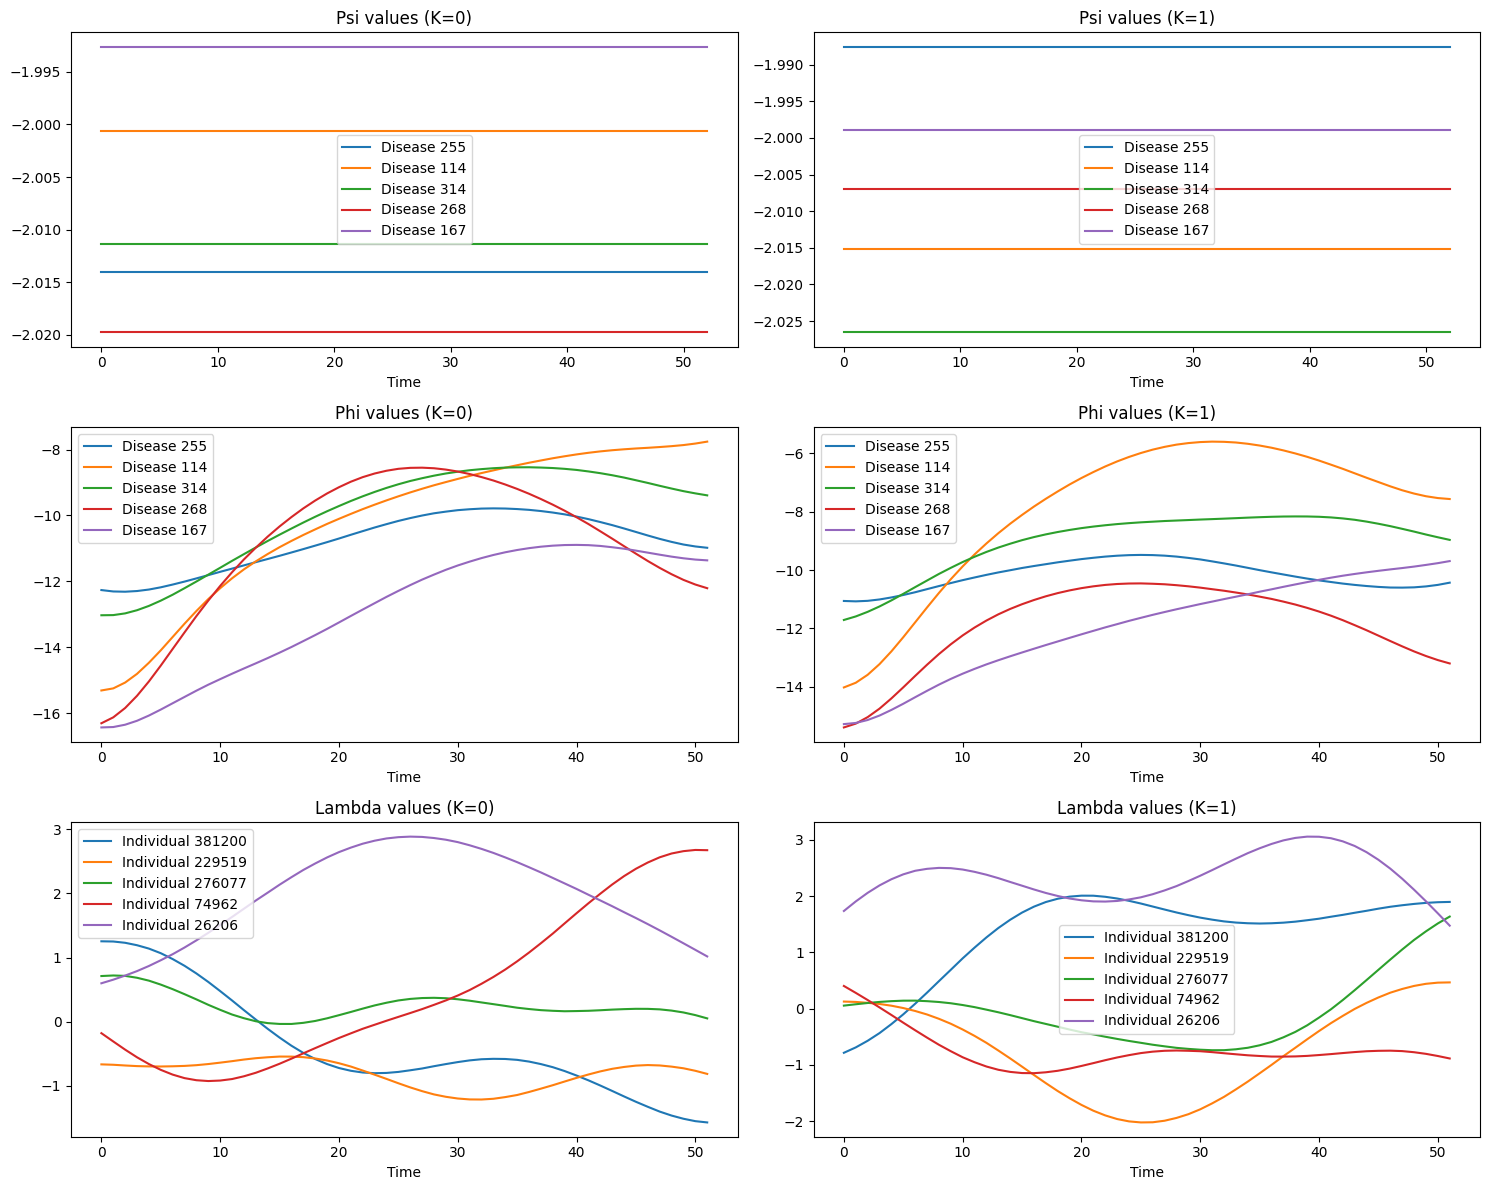


Cluster membership for sampled diseases:
Disease 255: Cluster 3
Disease 114: Cluster 5
Disease 314: Cluster 7
Disease 268: Cluster 8
Disease 167: Cluster 14


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:710: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


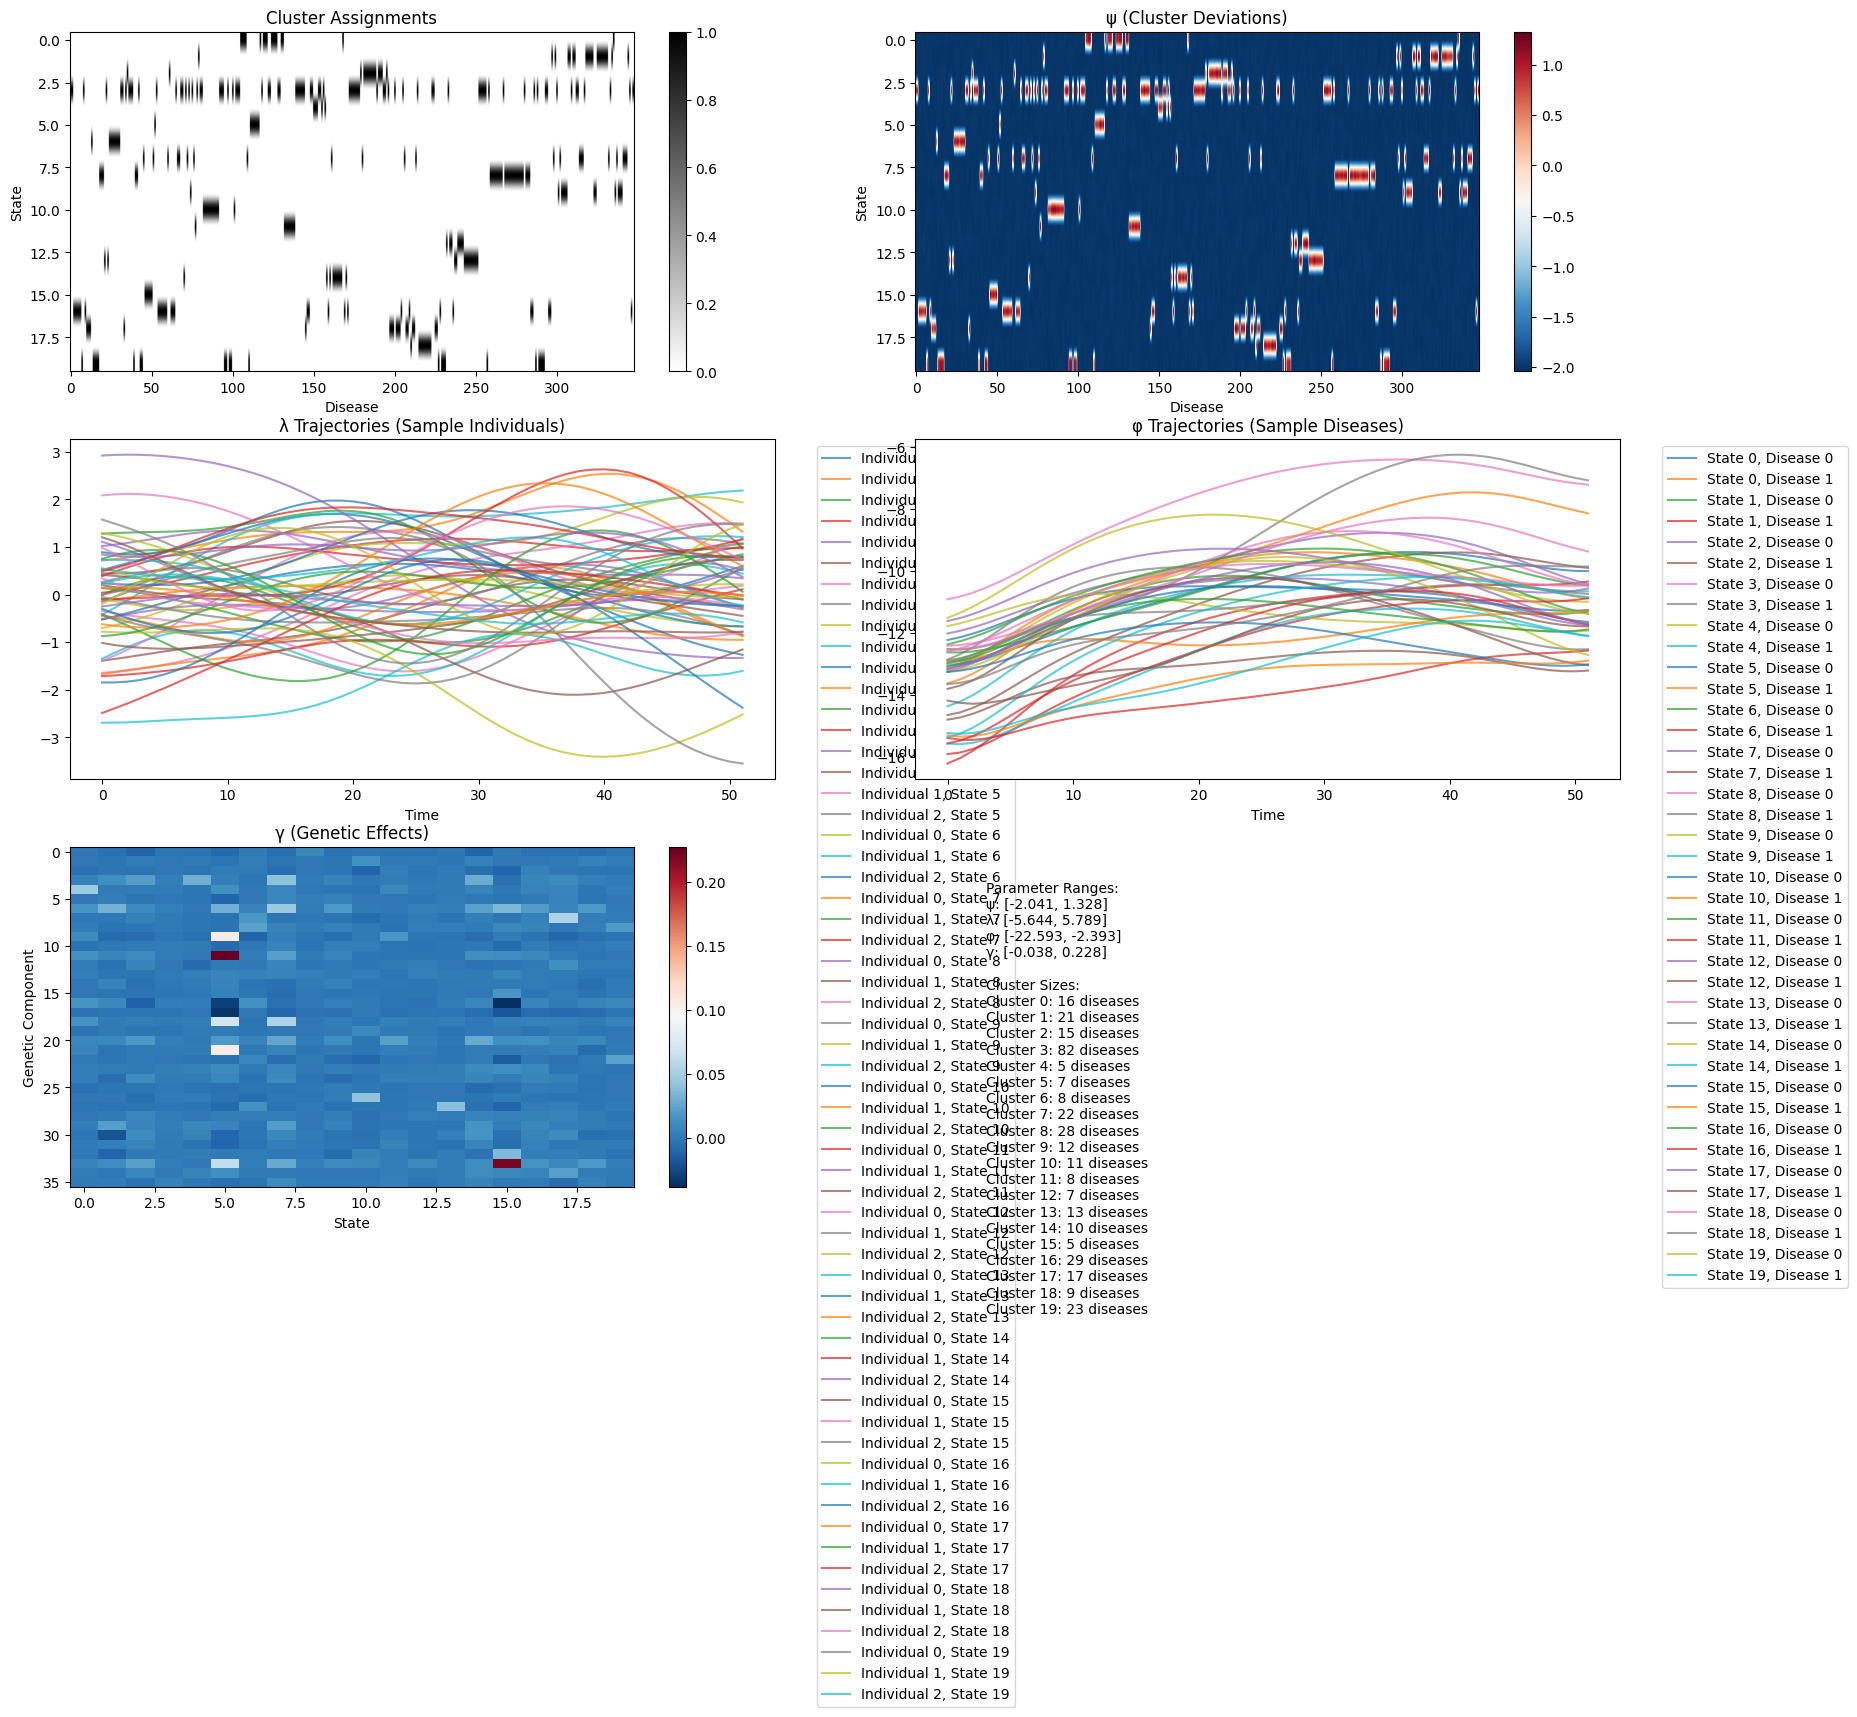

In [108]:

model.plot_initial_params()
model.visualize_initialization()

Check global values

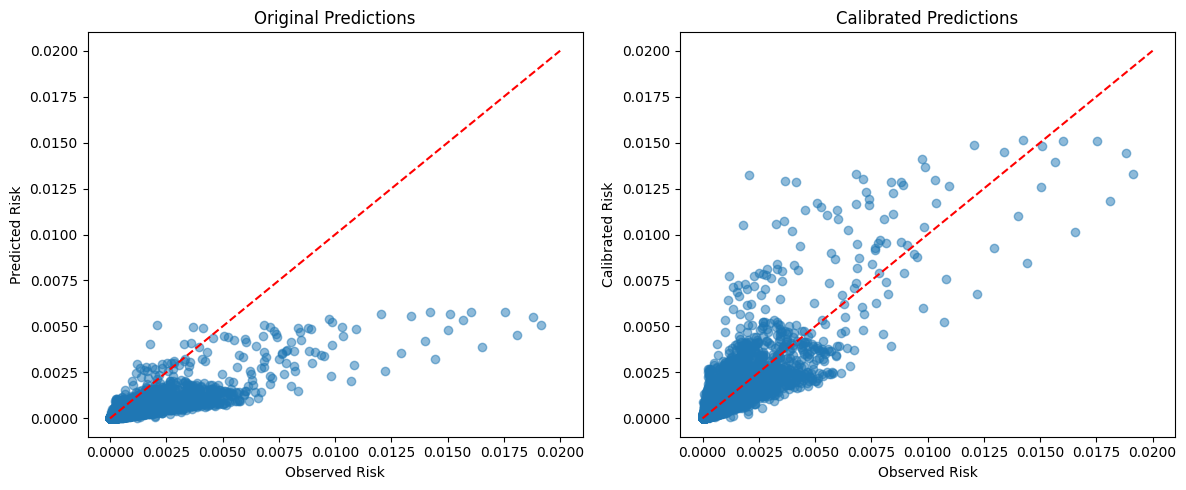

Mean observed risk: 0.000445
Mean predicted risk (original): 0.000171
Mean predicted risk (calibrated): 0.000445
Calibration scale factor: 2.609
R^2: 0.701


In [109]:
# 1. Get predictions and actual values for g
predicted = model.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()

# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")
ss_res = np.sum((observed_risk - calibrated_risk) ** 2)
ss_tot = np.sum((observed_risk - np.mean(observed_risk)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2: {r2:.3f}")

In [26]:
# Save both psi and clusters from the 400K initialization
torch.save(model.psi.detach(), 'initial_psi_400k.pt')
torch.save(model.clusters, 'initial_clusters_400k.pt')


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_13443/1894560737.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_clusters = torch.load('initial_cluste


Empirical signature proportions:
Signature 0 (16 diseases):
  t=0:  0.008
  t=51: 0.075
Signature 1 (21 diseases):
  t=0:  0.074
  t=51: 0.052
Signature 2 (15 diseases):
  t=0:  0.045
  t=51: 0.051
Signature 3 (82 diseases):
  t=0:  0.291
  t=51: 0.100
Signature 4 (5 diseases):
  t=0:  0.031
  t=51: 0.002
Signature 5 (7 diseases):
  t=0:  0.004
  t=51: 0.048
Signature 6 (8 diseases):
  t=0:  0.000
  t=51: 0.022
Signature 7 (22 diseases):
  t=0:  0.100
  t=51: 0.117
Signature 8 (28 diseases):
  t=0:  0.166
  t=51: 0.006
Signature 9 (12 diseases):
  t=0:  0.027
  t=51: 0.033
Signature 10 (11 diseases):
  t=0:  0.003
  t=51: 0.073
Signature 11 (8 diseases):
  t=0:  0.000
  t=51: 0.028
Signature 12 (7 diseases):
  t=0:  0.008
  t=51: 0.007
Signature 13 (13 diseases):
  t=0:  0.011
  t=51: 0.023
Signature 14 (10 diseases):
  t=0:  0.008
  t=51: 0.046
Signature 15 (5 diseases):
  t=0:  0.008
  t=51: 0.017
Signature 16 (29 diseases):
  t=0:  0.059
  t=51: 0.179
Signature 17 (17 diseases):
  

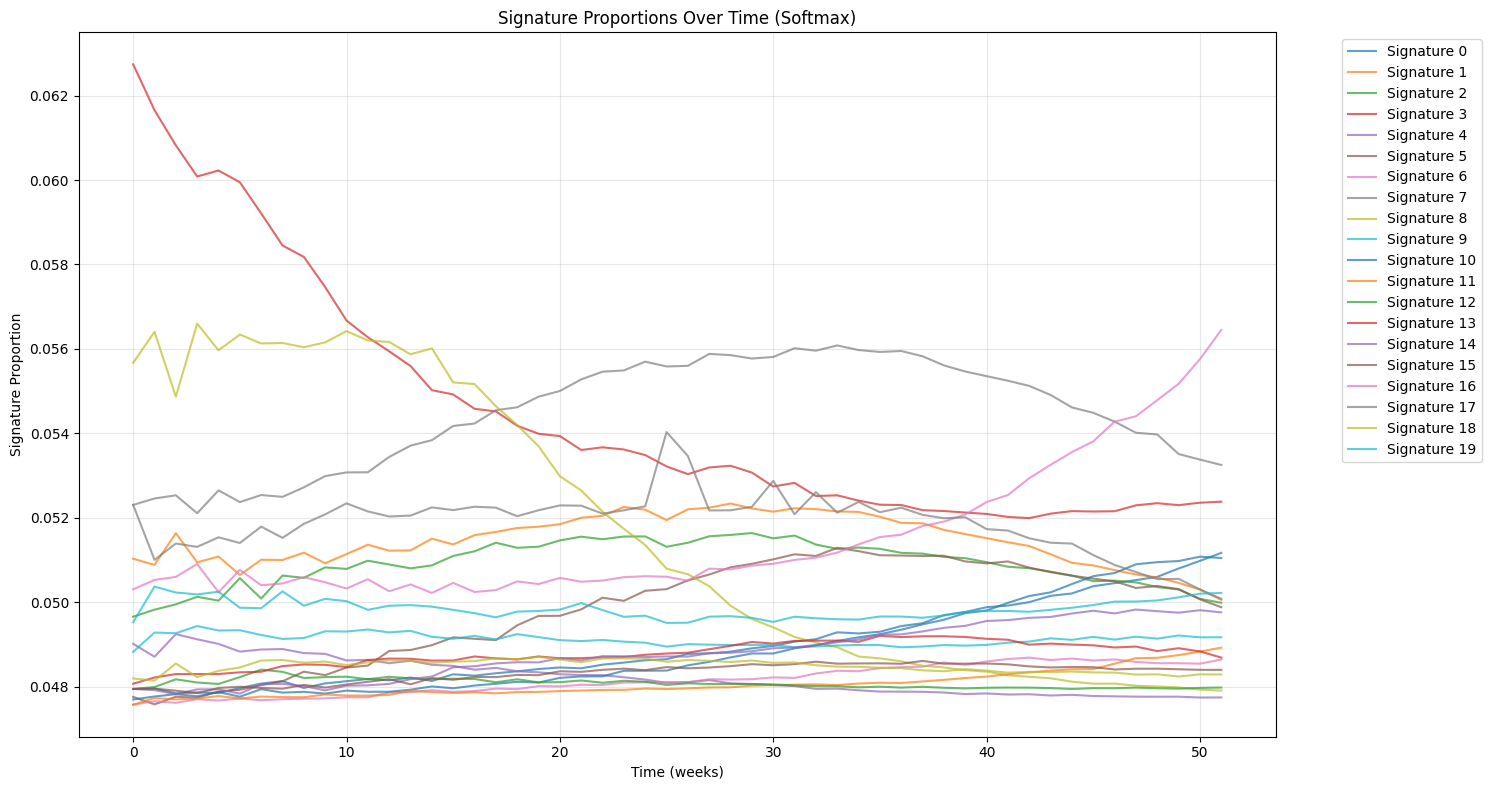


Signature proportion ranges:
Signature 0: 0.048 - 0.051
Signature 1: 0.050 - 0.052
Signature 2: 0.050 - 0.052
Signature 3: 0.052 - 0.063
Signature 4: 0.048 - 0.049
Signature 5: 0.048 - 0.051
Signature 6: 0.048 - 0.049
Signature 7: 0.052 - 0.056
Signature 8: 0.048 - 0.057
Signature 9: 0.049 - 0.049
Signature 10: 0.048 - 0.051
Signature 11: 0.048 - 0.049
Signature 12: 0.048 - 0.048
Signature 13: 0.048 - 0.049
Signature 14: 0.048 - 0.050
Signature 15: 0.048 - 0.049
Signature 16: 0.050 - 0.056
Signature 17: 0.050 - 0.054
Signature 18: 0.048 - 0.049
Signature 19: 0.050 - 0.050


In [4]:
# Load saved clusters
initial_clusters = torch.load('initial_clusters_400k.pt')

# Calculate signature proportions through time
Y_counts = Y.sum(dim=0)  # Sum over individuals: D x T
signature_props = torch.zeros(20, 52)  # (K=20 signatures, T=52 timepoints)

for k in range(20):
    cluster_mask = (initial_clusters == k)
    signature_props[k] = Y_counts[cluster_mask].sum(dim=0) / Y_counts.sum(dim=0)

# Print proportions at first and last timepoint
print("\nEmpirical signature proportions:")
for k in range(20):
    cluster_size = (initial_clusters == k).sum()
    print(f"Signature {k} ({cluster_size} diseases):")
    print(f"  t=0:  {signature_props[k,0]:.3f}")
    print(f"  t=51: {signature_props[k,-1]:.3f}")

# Add healthy proportion and rescale
healthy_prop = 0.05
signature_props = signature_props * (1 - healthy_prop)

import matplotlib.pyplot as plt

# Convert to softmax proportions
def softmax(x):
    exp_x = torch.exp(x - torch.max(x, dim=0)[0])
    return exp_x / exp_x.sum(dim=0)

# Calculate softmax proportions
softmax_props = softmax(signature_props)

# Plot
plt.figure(figsize=(15, 8))
timepoints = range(52)

# Plot each signature
for k in range(20):
    plt.plot(timepoints, softmax_props[k], label=f'Signature {k}', alpha=0.7)

plt.xlabel('Time (weeks)')
plt.ylabel('Signature Proportion')
plt.title('Signature Proportions Over Time (Softmax)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some summary stats
print("\nSignature proportion ranges:")
for k in range(20):
    min_prop = softmax_props[k].min().item()
    max_prop = softmax_props[k].max().item()
    print(f"Signature {k}: {min_prop:.3f} - {max_prop:.3f}")


Cluster sizes:
Signature 0: 16 diseases
Signature 1: 21 diseases
Signature 2: 15 diseases
Signature 3: 82 diseases
Signature 4: 5 diseases
Signature 5: 7 diseases
Signature 6: 8 diseases
Signature 7: 22 diseases
Signature 8: 28 diseases
Signature 9: 12 diseases
Signature 10: 11 diseases
Signature 11: 8 diseases
Signature 12: 7 diseases
Signature 13: 13 diseases
Signature 14: 10 diseases
Signature 15: 5 diseases
Signature 16: 29 diseases
Signature 17: 17 diseases
Signature 18: 9 diseases
Signature 19: 23 diseases


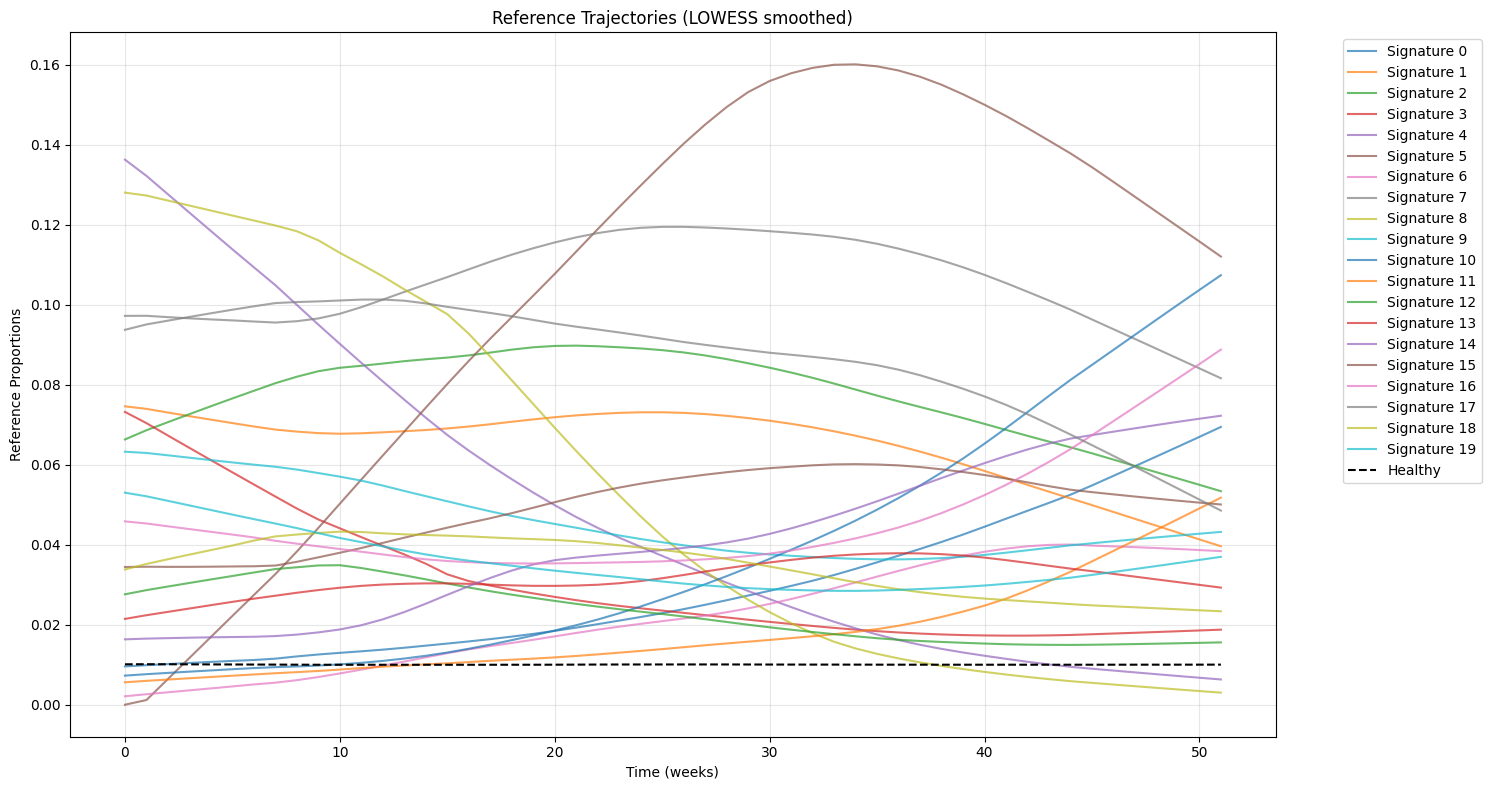


Value ranges after smoothing:
Signature refs: [-18.421, -1.834]
Healthy ref: -4.605


In [44]:
def create_reference_trajectories(Y, initial_clusters, K, healthy_prop=0.01, frac=0.3):
    """
    Create reference trajectories using LOWESS smoothing, normalized by cluster size
    """
    from statsmodels.nonparametric.smoothers_lowess import lowess
    T = Y.shape[2]
    
    # Get raw counts
    Y_counts = Y.sum(dim=0)  # D x T
    signature_props = torch.zeros(K, T)
    
    # First get cluster sizes
    cluster_sizes = torch.tensor([(initial_clusters == k).sum() for k in range(K)])
    
    # Get raw proportions, normalized by cluster size
    total_counts = Y_counts.sum(dim=0) + 1e-8
    for k in range(K):
        cluster_mask = (initial_clusters == k)
        # Divide by cluster size to normalize
        signature_props[k] = Y_counts[cluster_mask].sum(dim=0) / (cluster_sizes[k] * total_counts)
    
    # Normalize proportions
    signature_props = torch.clamp(signature_props, min=1e-8)
    signature_props = signature_props / signature_props.sum(dim=0, keepdim=True)
    signature_props *= (1 - healthy_prop)
    
    # Smooth using LOWESS
    times = np.arange(T)
    signature_refs = torch.zeros_like(signature_props)
    
    for k in range(K):
        smoothed = lowess(
            signature_props[k].numpy(), 
            times,
            frac=frac,
            it=3,
            delta=0.0,
            return_sorted=False
        )
        signature_refs[k] = torch.tensor(smoothed)
    
    # Convert to log space after smoothing
    signature_refs = torch.log(torch.clamp(signature_refs, min=1e-8))
    healthy_ref = torch.ones(T) * torch.log(torch.tensor(healthy_prop, dtype=torch.float32))
    
    # Print cluster sizes for verification
    print("\nCluster sizes:")
    for k in range(K):
        print(f"Signature {k}: {cluster_sizes[k]} diseases")
    
    return signature_refs, healthy_ref

# Test and visualize
signature_refs, healthy_ref = create_reference_trajectories(Y, initial_clusters, K=20)

# Plot both raw and smoothed
plt.figure(figsize=(15, 8))
props = torch.softmax(torch.vstack([signature_refs, healthy_ref]), dim=0)
for k in range(20):
    plt.plot(range(T), props[k], label=f'Signature {k}', alpha=0.7)
plt.plot(range(T), props[-1], label='Healthy', color='black', linestyle='--')
plt.xlabel('Time (weeks)')
plt.ylabel('Reference Proportions')
plt.title('Reference Trajectories (LOWESS smoothed)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some stats
print("\nValue ranges after smoothing:")
print(f"Signature refs: [{signature_refs.min():.3f}, {signature_refs.max():.3f}]")
print(f"Healthy ref: {healthy_ref[0]:.3f}")


In [45]:
# Save both references
torch.save({
    'signature_refs': signature_refs,
    'healthy_ref': healthy_ref
}, 'reference_trajectories.pt')


In [ ]:

plt.figure(figsize=(15, 8))
props = torch.softmax(torch.vstack([signature_refs, healthy_ref]), dim=0)
for k in range(20):
    plt.plot(range(T), props[k], label=f'Signature {k}', alpha=0.7)
plt.plot(range(T), props[-1], label='Healthy', color='black', linestyle='--')
plt.xlabel('Time (weeks)')
plt.ylabel('Reference Proportions')
plt.title('Reference Trajectories (after softmax)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print proportion verification
print("\nProportion verification:")
print(f"Healthy proportion: {props[-1].mean():.3f}")
print(f"Total proportions sum: {props.sum(dim=0).mean():.3f}")

In [27]:

# For verification, let's save the cluster sizes too
original_cluster_sizes = {}
unique, counts = np.unique(model.clusters, return_counts=True)
for k, count in zip(unique, counts):
    original_cluster_sizes[k] = count
print("\nOriginal cluster sizes:")
for k, count in original_cluster_sizes.items():
    print(f"Cluster {k}: {count} diseases")
# For the 50K batches, load and use this psi:
#initial_psi = torch.load('initial_psi_400k.pt')
# don't run below this line, computer will crash



Original cluster sizes:
Cluster 0: 16 diseases
Cluster 1: 21 diseases
Cluster 2: 15 diseases
Cluster 3: 82 diseases
Cluster 4: 5 diseases
Cluster 5: 7 diseases
Cluster 6: 8 diseases
Cluster 7: 22 diseases
Cluster 8: 28 diseases
Cluster 9: 12 diseases
Cluster 10: 11 diseases
Cluster 11: 8 diseases
Cluster 12: 7 diseases
Cluster 13: 13 diseases
Cluster 14: 10 diseases
Cluster 15: 5 diseases
Cluster 16: 29 diseases
Cluster 17: 17 diseases
Cluster 18: 9 diseases
Cluster 19: 23 diseases


In [6]:
def subset_data(Y, E, G, n_samples=50000, seed=42):
    """
    Subset the data to n_samples individuals while maintaining consistency
    
    Args:
        Y: tensor of shape [N, D, T]
        E: tensor of shape [N, D]
        G: tensor of shape [N, P]
        n_samples: number of individuals to keep
        seed: random seed for reproducibility
    
    Returns:
        Y_sub, E_sub, G_sub: subsetted tensors
    """
    torch.manual_seed(seed)
    
    # Get total number of individuals
    N = Y.shape[0]
    
    # Randomly select n_samples indices
    indices = torch.randperm(N)[:n_samples]
    
    # Subset all matrices using the same indices
    Y_sub = Y[indices]
    E_sub = E[indices]
    G_sub = G[indices]
    
    print(f"Original shapes: Y={Y.shape}, E={E.shape}, G={G.shape}")
    print(f"New shapes: Y={Y_sub.shape}, E={E_sub.shape}, G={G_sub.shape}")
    
    return Y_sub, E_sub, G_sub, indices

# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, n_samples=10000)


Original shapes: Y=torch.Size([407878, 348, 52]), E=torch.Size([407878, 348]), G=(407878, 36)
New shapes: Y=torch.Size([10000, 348, 52]), E=torch.Size([10000, 348]), G=(10000, 36)


In [7]:
model_batch = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0],
    D=Y_100k.shape[1],
    T=Y_100k.shape[2],
    K=essentials['K'],
    P=essentials['P'],
    G=G_100k,
    Y=Y_100k,
    prevalence_t=essentials['prevalence_t']
)

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 11 diseases
Cluster 1: 74 diseases
Cluster 2: 30 diseases
Cluster 3: 7 diseases
Cluster 4: 23 diseases
Cluster 5: 10 diseases
Cluster 6: 17 diseases
Cluster 7: 14 diseases
Cluster 8: 21 diseases
Cluster 9: 5 diseases
Cluster 10: 8 diseases
Cluster 11: 9 diseases
Cluster 12: 12 diseases
Cluster 13: 31 diseases
Cluster 14: 25 diseases
Cluster 15: 5 diseases
Cluster 16: 9 diseases
Cluster 17: 17 diseases
Cluster 18: 11 diseases
Cluster 19: 9 diseases
Initialization complete!


In [9]:
# When initializing the model for 50K batches:
initial_psi_load = torch.load('initial_psi_400k.pt')
initial_cluster_load = torch.load('initial_clusters_400k.pt')


print("Psi values match:", torch.allclose(initial_psi_load, model.psi))



Psi values match: False


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_13443/474936076.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi_load = torch.load('initial_psi_400

In [11]:
model_batch.initialize_params(true_psi=initial_psi_load)
model_batch.clusters = initial_cluster_load



Using true psi from simulation
Initialization complete!


In [12]:

# Verify the psi values match
print("Psi values match:", torch.allclose(model_batch.psi, initial_psi_load))

Psi values match: True


In [13]:
def test_different_eps(model, E_tensor, num_tests=5):
    # Fix phi and gamma
    original_phi = model.phi.detach().clone()
    original_gamma = model.gamma.detach().clone()
    
    results = []
    for i in range(num_tests):
        # Only change eps in lambda initialization
        lambda_init = torch.zeros((model.N, model.K, model.T))
        for k in range(model.K):
            lambda_means = model.G @ original_gamma[:, k]
            L_k = torch.linalg.cholesky(model.K_lambda[k])
            for n in range(model.N):
                eps = L_k @ torch.randn(model.T)  # Different random noise each time
                lambda_init[n, k, :] = lambda_means[n] + eps
        
        model.lambda_ = nn.Parameter(lambda_init)
        model.phi = nn.Parameter(original_phi)  # Keep phi fixed
        
        # Run a few epochs
        history = model.fit(E_tensor, num_epochs=10, learning_rate=1e-4, lambda_reg=1e-2)
        
        # Get theta (signature weights)
        theta = torch.softmax(model.lambda_, dim=1)
        healthy_weights = theta[:, 0, :]  # Assuming healthy is first signature
        
        results.append({
            'final_loss': history[-1],
            'theta': theta.detach().clone(),
            'healthy_weights': healthy_weights.detach().clone()
        })
        
        print(f"\nTest {i+1}:")
        print(f"Final loss: {history[-1]:.4f}")
        print(f"Mean healthy weight: {healthy_weights.mean():.3f}")

    return results

In [15]:
test_different_eps(model_batch, E_100k, num_tests=5)

Starting training...


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:209: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)


mask_before_event shape: torch.Size([10000, 348, 52])
mask_at_event shape: torch.Size([10000, 348, 52])

Epoch 0
Loss: 1107.8235
Psi gradient stats:
Mean: 9.1185e-05
Std:  4.7808e-03
Max:  1.6046e-02
Min:  -1.8920e-02
Epoch 0, Loss: 1107.8235, Gradients - Lambda: 5.779e-01, Phi: 1.367e+01, Gamma: 5.942e-02, Psi: 1.892e-02
mask_before_event shape: torch.Size([10000, 348, 52])
mask_at_event shape: torch.Size([10000, 348, 52])

Epoch 1
Loss: 961.2592
Psi gradient stats:
Mean: 9.0450e-05
Std:  4.7724e-03
Max:  1.5956e-02
Min:  -1.8771e-02
Epoch 1, Loss: 961.2592, Gradients - Lambda: 5.374e-01, Phi: 1.334e+01, Gamma: 5.896e-02, Psi: 1.877e-02

Estimated total training time: 5.1 minutes
mask_before_event shape: torch.Size([10000, 348, 52])
mask_at_event shape: torch.Size([10000, 348, 52])

Epoch 2
Loss: 836.1190
Psi gradient stats:
Mean: 8.9716e-05
Std:  4.7640e-03
Max:  1.5907e-02
Min:  -1.8639e-02
Epoch 2, Loss: 836.1190, Gradients - Lambda: 4.990e-01, Phi: 1.293e+01, Gamma: 5.855e-02, Psi

KeyError: -1

Psi values match: True

Parameter shapes:
Lambda: torch.Size([10000, 20, 52])
Phi: torch.Size([20, 348, 52])
Gamma: torch.Size([36, 20])


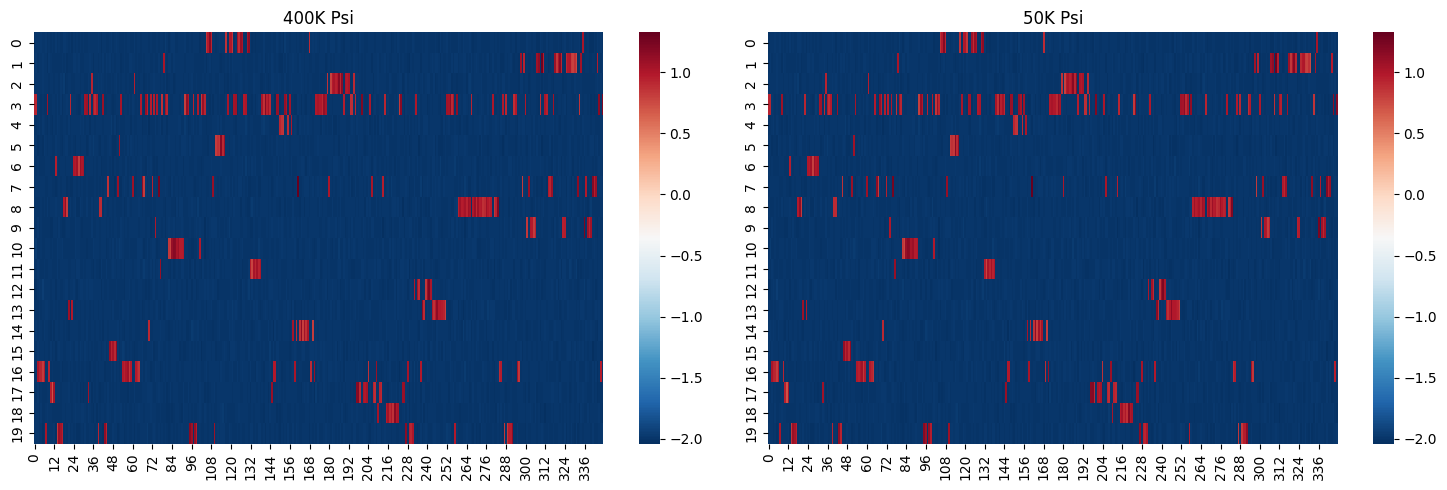

True

In [53]:
def verify_initialization(model_400k, model_50k):
    """Verify that the 50K model initialized correctly with 400K psi"""
    
    # Check psi values match
    psi_match = torch.allclose(model_400k.psi, model_50k.psi)
    print("Psi values match:", psi_match)
    
    # Check shapes of other parameters
    print("\nParameter shapes:")
    print(f"Lambda: {model_50k.lambda_.shape}")
    print(f"Phi: {model_50k.phi.shape}")
    print(f"Gamma: {model_50k.gamma.shape}")
    
    # Visualize both initializations
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    sns.heatmap(model_400k.psi.detach().numpy(), cmap='RdBu_r')
    plt.title("400K Psi")
    
    plt.subplot(122)
    sns.heatmap(model_50k.psi.detach().numpy(), cmap='RdBu_r')
    plt.title("50K Psi")
    
    plt.tight_layout()
    plt.show()
    
    return psi_match

verify_initialization(model, model_batch)

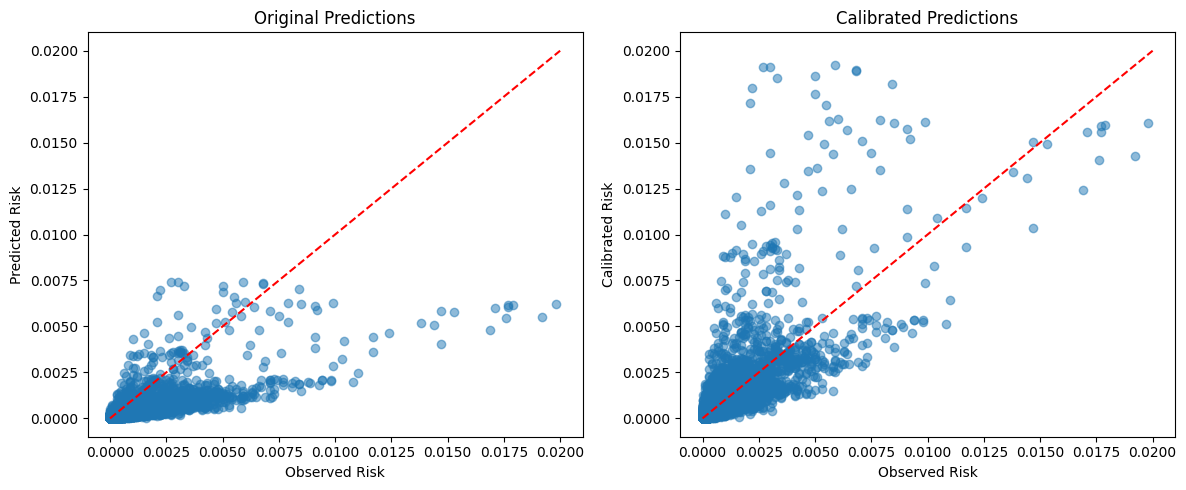

Mean observed risk: 0.000451
Mean predicted risk (original): 0.000175
Mean predicted risk (calibrated): 0.000451
Calibration scale factor: 2.581
R^2: 0.398


In [92]:
# 1. Get predictions and actual values for g
predicted = model_batch.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model_batch.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()

# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")
ss_res = np.sum((observed_risk - calibrated_risk) ** 2)
ss_tot = np.sum((observed_risk - np.mean(observed_risk)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2: {r2:.3f}")


In [98]:
def calculate_calibration_stats(model, Y):
    """Calculate calibration stats for a model"""
    with torch.no_grad():
        predicted = model.forward()
        pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
        pi_pred = pi_pred.cpu().detach().numpy()
        
        observed_risk = Y.mean(axis=0).flatten()
        predicted_risk = pi_pred.mean(axis=0).flatten()
        
        scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
        calibrated_risk = predicted_risk * scale_factor
        
        ss_res = np.sum((observed_risk - calibrated_risk) ** 2)
        ss_tot = np.sum((observed_risk - np.mean(observed_risk)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        
        return r2, scale_factor, observed_risk, predicted_risk, calibrated_risk

# 1. Global R² (we know it's 0.70)
print(f"Global model R² (known): 0.70")

# 2. Batch with fresh initialization
model_batch_fresh = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], D=Y_100k.shape[1], T=Y_100k.shape[2],
    K=essentials['K'], P=essentials['P'],
    G=G_100k, Y=Y_100k, prevalence_t=essentials['prevalence_t']
)
model_batch_fresh.initialize_params(psi_config=psi_config)
r2_fresh, scale_fresh, obs_fresh, pred_fresh, cal_fresh = calculate_calibration_stats(model_batch_fresh, Y_100k)
print(f"\nBatch model with fresh initialization:")
print(f"R²: {r2_fresh:.3f}")
print(f"Calibration scale factor: {scale_fresh:.3f}")


Global model R² (known): 0.70
Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 11 diseases
Cluster 1: 74 diseases
Cluster 2: 30 diseases
Cluster 3: 7 diseases
Cluster 4: 23 diseases
Cluster 5: 10 diseases
Cluster 6: 17 diseases
Cluster 7: 14 diseases
Cluster 8: 21 diseases
Cluster 9: 5 diseases
Cluster 10: 8 diseases
Cluster 11: 9 diseases
Cluster 12: 12 diseases
Cluster 13: 31 diseases
Cluster 14: 25 diseases
Cluster 15: 5 diseases
Cluster 16: 9 diseases
Cluster 17: 17 diseases
Cluster 18: 11 diseases
Cluster 19: 9 diseases
Initialization complete!

Using psi configuration
Initialization complete!

Batch model with fresh initialization:
R²: 0.493
Calibration scale factor: 2.541


In [94]:
# 3. Batch with global psi
# Set random seeds for reproducibility
torch.manual_seed(222)
np.random.seed(222)
if torch.cuda.is_available():
    torch.cuda.manual_seed(222)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

model_batch_global = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], D=Y_100k.shape[1], T=Y_100k.shape[2],
    K=essentials['K'], P=essentials['P'],
    G=G_100k, Y=Y_100k, prevalence_t=essentials['prevalence_t']
)
model_batch_global.initialize_params(true_psi=initial_psi_load)
model_batch_global.clusters = initial_cluster_load
r2_global, scale_global, obs_global, pred_global, cal_global = calculate_calibration_stats(model_batch_global, Y_100k)
print(f"\nBatch model with global psi:")
print(f"R²: {r2_global:.3f}")
print(f"Calibration scale factor: {scale_global:.3f}")


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 11 diseases
Cluster 1: 74 diseases
Cluster 2: 30 diseases
Cluster 3: 7 diseases
Cluster 4: 23 diseases
Cluster 5: 10 diseases
Cluster 6: 17 diseases
Cluster 7: 14 diseases
Cluster 8: 21 diseases
Cluster 9: 5 diseases
Cluster 10: 8 diseases
Cluster 11: 9 diseases
Cluster 12: 12 diseases
Cluster 13: 31 diseases
Cluster 14: 25 diseases
Cluster 15: 5 diseases
Cluster 16: 9 diseases
Cluster 17: 17 diseases
Cluster 18: 11 diseases
Cluster 19: 9 diseases
Initialization complete!

Using true psi from simulation
Initialization complete!

Batch model with global psi:
R²: 0.663
Calibration scale factor: 2.700


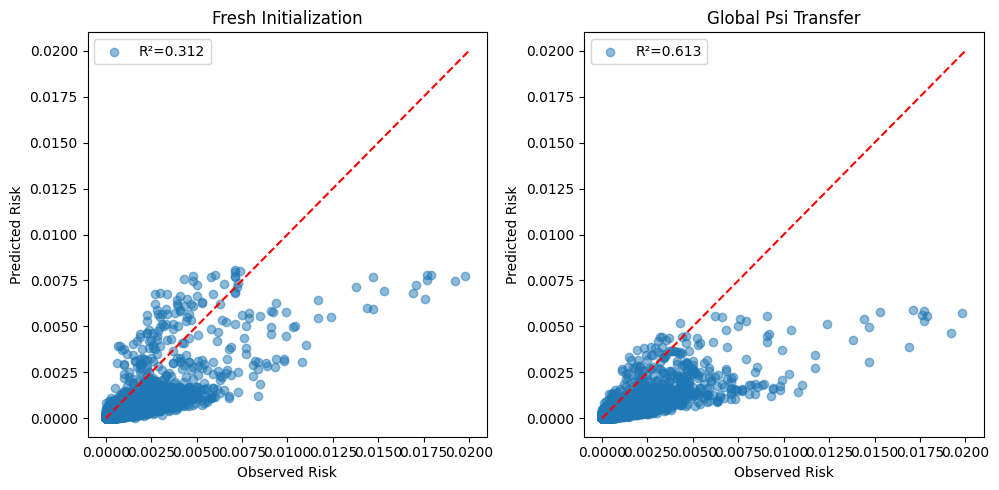

In [57]:
# Plot comparison
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(obs_fresh, pred_fresh, alpha=0.5, label=f'R²={r2_fresh:.3f}')
plt.plot([0, 0.02], [0, 0.02], 'r--')
plt.title('Fresh Initialization')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')
plt.legend()

plt.subplot(132)
plt.scatter(obs_global, pred_global, alpha=0.5, label=f'R²={r2_global:.3f}')
plt.plot([0, 0.02], [0, 0.02], 'r--')
plt.title('Global Psi Transfer')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')
plt.legend()

plt.tight_layout()
plt.show()